<a href="https://colab.research.google.com/github/sushigva/Foundations-of-Data-Science-Repo/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [16]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.
is_it_even_or_odd <- function(y) {
  if (y %% 2 == 0) {
    return(paste("The integer", y, "is even"))
  } else {
    return(paste("The integer", y, "is odd"))
  }
}


is_it_even_or_odd(2)
is_it_even_or_odd(9)

[1] "The integer 2 is even"

[1] "The integer 9 is odd"

In [17]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.

calculate_the_mean <- function(a = 1, b = 2, c = 3, d = 4) {
  mean_value <- mean(c(a, b, c, d))
  return(mean_value)
}

calculate_the_mean(5, 6, 7, 8)

calculate_the_mean()

[1] 6.5

[1] 2.5

## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



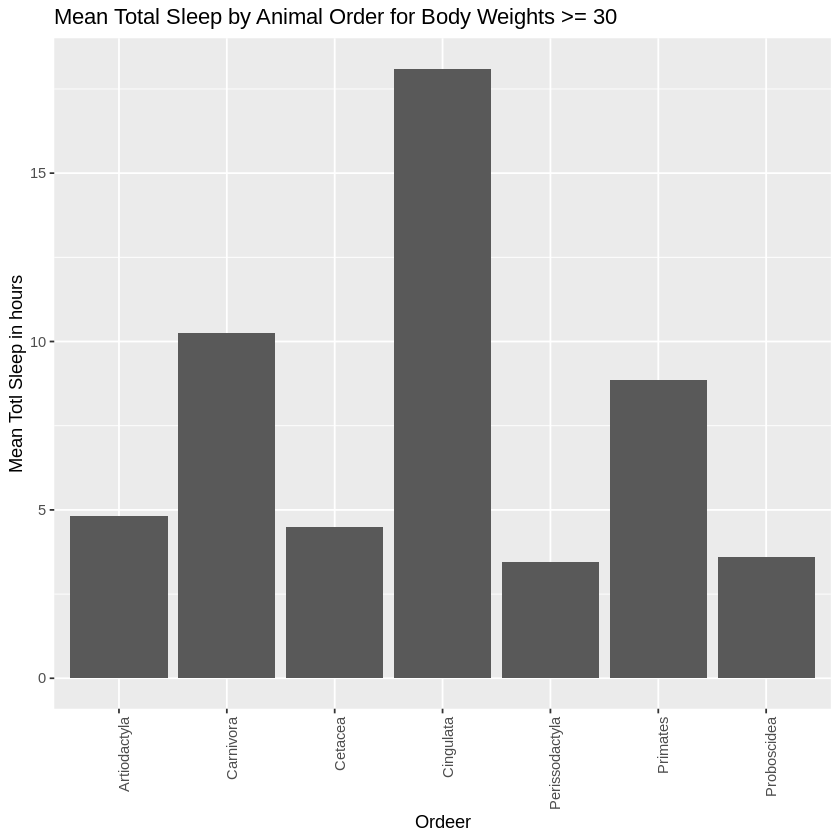

In [25]:
#instanlled ggplot for msleep
install.packages("ggplot2")

# loaded ggplot2
library(ggplot2)
# get msleep dataset from ggplot2
data("msleep", package = "ggplot2")
# filter animals with body weights >= 30
filter_data <- subset(msleep, bodywt >= 30)

# calculated mean sleep_total by the order
mean_sleep_by_the_order <- aggregate(sleep_total ~ order, data = filter_data, mean)


# make the bar plot
ggplot(mean_sleep_by_the_order, aes(x = order, y = sleep_total)) +
  geom_bar(stat = "identity") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(x = "Ordeer", y = "Mean Totl Sleep in hours", title = "Mean Total Sleep by Animal Order for Body Weights >= 30")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [42]:
# got required library
library(dplyr)
library(readr)
#  data from the url
url <- "https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv"
data <- read_csv(url)

# remove duplicate rows
data_clean <- distinct(data)
# show it happend
cat("rows lef  after removing duplicates:", nrow(data_clean), "\n")

# remove records where last_login or birthdate are empty
data_clean <- data_clean %>% filter(!is.na(last_login) & !is.na(birthdate))
# show it happend
cat("rows left after removing empty last_login or birthdate:", nrow(data_clean), "\n")

# display records with the 10 highest follower counts
top_followers <- data_clean %>% arrange(desc(followers)) %>% head(10)
# show it
cat("Top10 followers:\n")
print(top_followers)

# Determine counts of users grouped by continent
continent_counts <- data_cleaned %>% group_by(continent) %>% summarise(count = n())
# show
cat("user counts counts by continent:\n")
print(continent_counts)

Rows: 1318 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): username, full_name, birthdate, email, continent, last_login, inter...
dbl (1): followers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


rows lef  after removing duplicates: 1000 
rows left after removing empty last_login or birthdate: 650 
Top10 followers:
# A tibble: 10 × 8
   username   full_name birthdate email continent followers last_login interests
   <chr>      <chr>     <chr>     <chr> <chr>         <dbl> <chr>      <chr>    
 1 lleckeyb6  Lynne Le… 4/19/1998 llec… SA            99977 3/14/2021  sports   
 2 spharoaha2 Staci Ph… 9/2/1985  spha… NA            99905 10/26/2023 sports   
 3 cduftondy  Celisse … 8/24/1995 cduf… OC            99707 9/26/2021  sports   
 4 dbartalin… Desiree … 8/23/1993 dbar… AF            99618 5/30/2022  music    
 5 grivardmp  Gwen Riv… 9/12/1982 griv… OC            99526 4/4/2020   music    
 6 mraggitt9g Morgan R… 11/16/19… mrag… NA            99508 11/12/2021 music    
 7 wbenese7   Wain Ben… 3/9/1998  wben… NA            99400 10/1/2021  travel   
 8 kmorriceht Kitti Mo… 6/3/1995  kmor… SA            98936 3/24/2021  sports   
 9 smacdonne… Shoshann… 9/12/2002 smac… AS        